# Michal Stawikowski Kohonen 1.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import seaborn as sns
import warnings
from matplotlib import patches as patches
import copy
warnings.simplefilter("ignore")
%matplotlib inline
import math
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use("bmh")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
from mpl_toolkits import mplot3d

# Implementation

In [9]:
class Kohonen_Network(object):
    
    def __init__(self, M, N, data_dim, random = True, top = "rectangular"):
        self.M = M #Width of map
        self.N = N #Height of map
        self.data_dim = data_dim #Input data dimension
        self.top = top
        if(random):
            self.map = np.random.random((M, N, data_dim)) #Random map initialization
        else:
            self.map = np.zeros((M, N, data_dim))
        
    def lr_decay(self, i, epochs): #Learining decay
        return np.exp(-i / epochs)
    
    def gaussian(self, t, d): #Gausian function
        return np.exp(-((d*t*self.n_width)**2))
    
    def gaussian_s_der(self, t, d): #Gausin's function second derivative
        #return (2-4*(d*t*self.n_width)**2)*np.exp(-((d*t*self.n_width)**2))
        #return (2*((d*self.n_width)**2)-4*(((d*self.n_width)**2)*t)**2)*np.exp(-((d*t*self.n_width)**2))
        #return ((2-4*(d*self.n_width)**2)*np.exp(-((d*self.n_width)**2)))/2
        sigma = self.n_width*np.exp(-t / self.epochs)
        a = 1/((sigma**3)*math.sqrt(2*math.pi))
        b = (1-(d/sigma)**2)
        c = np.exp(-((d/sigma)**2)/2)
        return a*b*c
    
    def euclidean_metric(self,x, y):
        d = x - y
        return np.sqrt(np.sum(d * d, axis=-1))
    
    def hex_dist(self, x, y): #Distance in hexagonal topography
        a1, b1 = x
        a2, b2 = y
        delta_1 = a2 - a1
        delta_2 = (b2 + a2 // 2) - (b1 + a1 // 2)
        if ((delta_1 >= 0 and delta_2 >= 0) or (delta_1 < 0 and delta_2 < 0)):
            result =  max(abs(delta_1), abs(delta_2))
        else:
            result = abs(delta_1) + abs(delta_2)
        
        return result

    def closest_neuron(self, x):
        min_dist = np.inf
        min_indx = np.array([0,0])
        for i in range(self.M):
            for j in range(self.N):
                w = self.map[i,j]
                dist = self.euclidean_metric(w, x)
                if dist < min_dist:
                    min_dist = dist
                    min_indx = np.array([i,j])
        
        return (min_dist, min_indx)
    
    def train(self, data, epochs, n_fun = "gaussian", n_width = 1, lr = 1):
        self.n_width = n_width #Neighborhood size
        self.lr = lr #Learning rate
        self.epochs = epochs
        if(n_fun == "gaussian"):
            fun = self.gaussian
        else:
            fun = self.gaussian_s_der
            
        for t in range(epochs):
            shuffle = np.random.permutation(data.shape[0])
            data = data[shuffle,:]
            for x in data:
                min_dist, min_indx = self.closest_neuron(x)
                for i in range(self.M):
                    for j in range(self.N):
                        w = self.map[i,j]
                        if (self.top == "rectangular"):
                            dist = self.euclidean_metric(min_indx, [i,j])
                        else:
                            dist = self.hex_dist(min_indx, [i,j])
                        self.map[i,j] = w + fun(t, dist)*self.lr_decay(t,epochs)*(x-w)
            
        
                    
    
    
    

# LAB 1

# Hexagon

In [347]:
data = pd.read_csv("C:/Users/jaiko/Desktop/MIOD/Kohonen/mio2/hexagon.csv",header=0)
#data.x = (data.x - data.x.mean())/data.x.std()
#data.y = (data.y - data.y.mean())/data.y.std()
x = np.array(data.iloc[:,0:2])
y = np.array((data.c))

## Original data

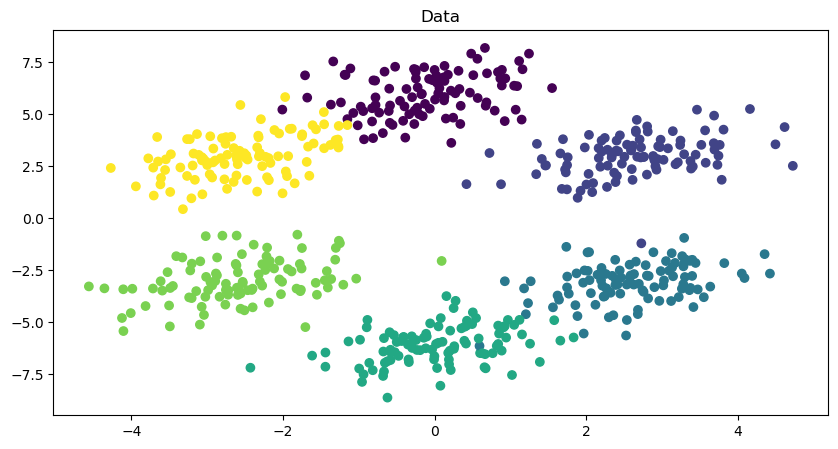

In [324]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#sns.scatterplot(x = "x", y = "y", data = data, hue = "c")
plt.figure(figsize = [10,5]);
plt.scatter(x = "x", y = "y", data = data, c = "c");
plt.title("Data");
plt.show();

# First try

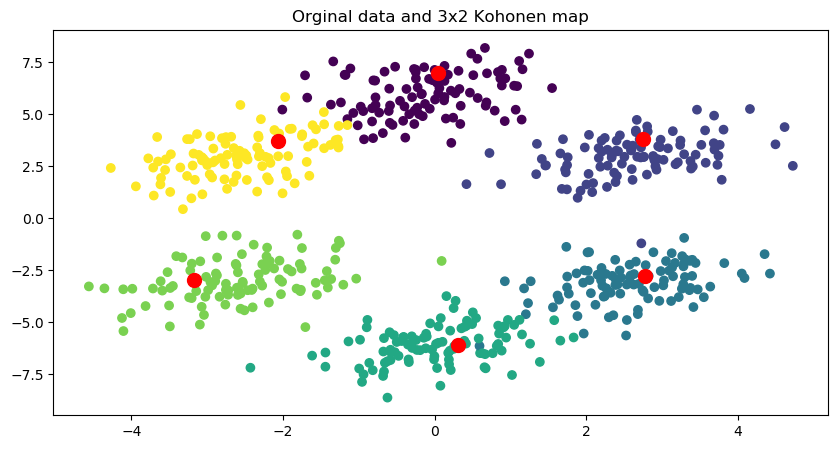

In [325]:
net = Kohonen_Network(3,2,2)
net.train(x, epochs = 10, n_width = 1)
map_data = net.map
map_data = map_data.reshape(-1,2)

plt.figure(figsize = [10,5]);
plt.scatter(x = "x", y = "y", data = data, c = "c");
plt.scatter(map_data[:,0], map_data[:,1], c = "red", s = 100)
plt.title("Orginal data and 3x2 Kohonen map");
plt.show();

As we can see it detected clusters pretty well.

## Gaussian function

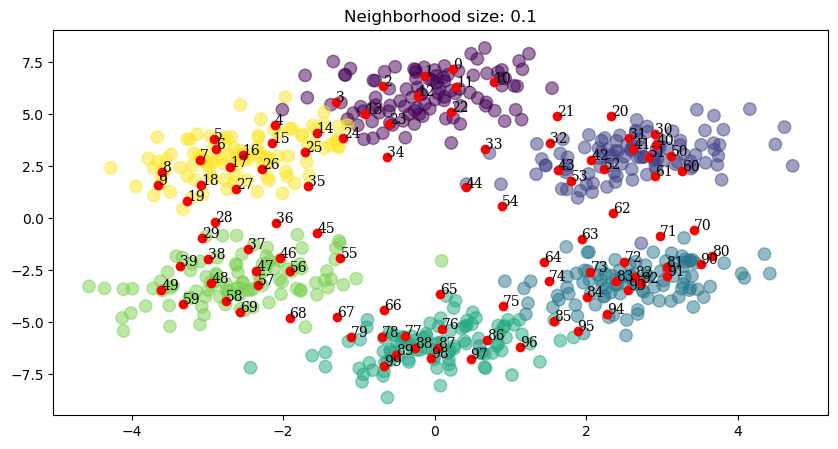

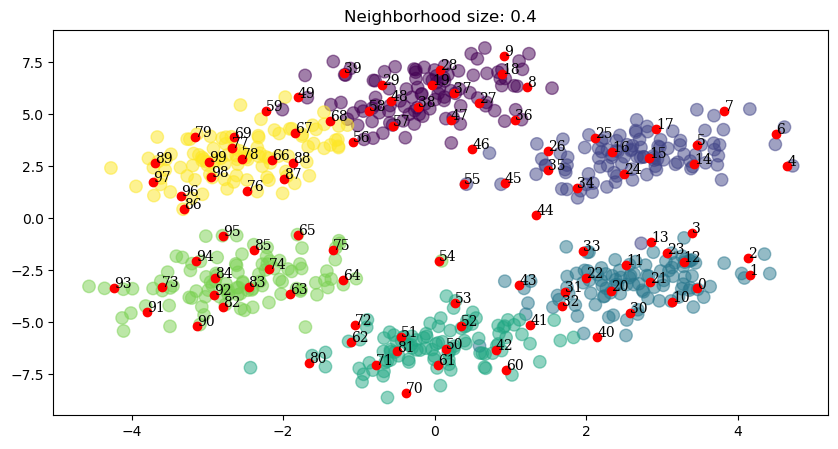

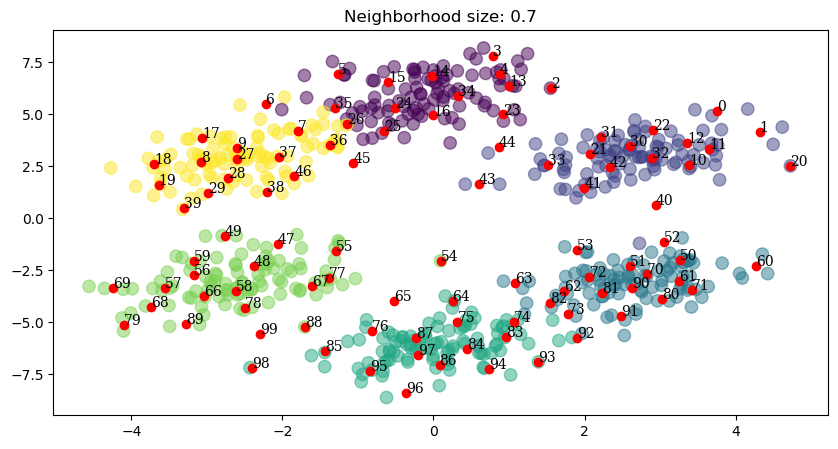

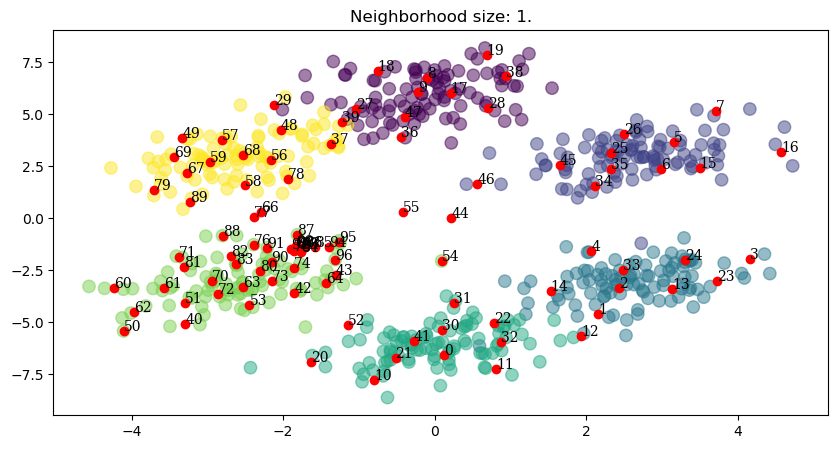

In [326]:
neigh_size = np.arange(0.1,1.1,0.3)
font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }
for size in neigh_size:
   
    net = Kohonen_Network(10,10,2)
    net.train(x, epochs = 10, n_width = size)
    map_data = copy.copy(net.map)
    map_data = map_data.reshape(-1,2)

    plt.figure(figsize = [10,5]);
    plt.scatter(x = "x", y = "y", data = data, c = "c",s = 80, alpha = 0.5);
    plt.scatter(map_data[:,0], map_data[:,1], c = "red");
    i=0
    for a in range(1, net.M + 1):
        for b in range(1, net.N + 1):
            plt.text(net.map[a-1,b-1,:][0], net.map[a-1,b-1,:][1], str(i), fontdict=font)
            i += 1
    plt.title("Neighborhood size: " + np.array2string(size));
    
    plt.show();
pass;   

As can be seen from the above charts, clusters have more or less been identified, their number corresponds to the number of classes, and their location is similiar to these from the original data. With the growing size of the neighborhood, the uneven density of points in individual clusters increased. Network learning time is quite long compared to MLP. Neurons close at MxN map have simmiliar weights as we can see from indexing.

## Weight Heatmap

In [365]:
x = np.array(data.iloc[:,0:2])
y = np.array((data.c))
net = Kohonen_Network(10,10,2)
net.train(x, epochs = 3, n_width = 0.4)

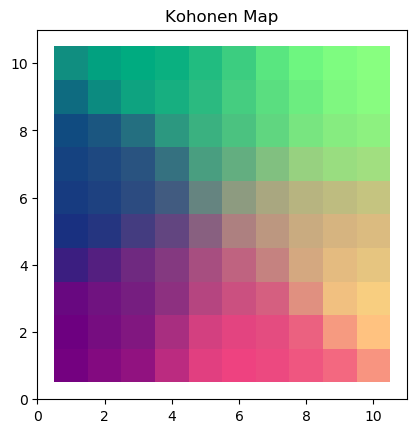

In [366]:
map_data = copy.copy(net.map)
map_data = map_data.reshape(-1,2)
map_data[:,0] = (map_data[:,0] - np.min(map_data[:,0]))/(np.max(map_data[:,0])-np.min(map_data[:,0]))
map_data[:,1] = (map_data[:,1] - np.min(map_data[:,1]))/(np.max(map_data[:,1])-np.min(map_data[:,1]))

col = map_data.reshape(net.M,net.N,2)
fig = plt.figure()
zeros = np.zeros((net.M,net.N,3))
zeros[:,:,2] = 0.5
zeros[:,:,:2] = col


ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.M+1))
ax.set_ylim((0, net.N+1))
ax.set_title('Kohonen Map')

# plot
for x in range(1, net.M + 1):
    for y in range(1, net.N + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=zeros[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

We can clarly see the division into all clusters here and that close neurons have simlilliar weights

## Gaussian second derivative

In [522]:
data = pd.read_csv("C:/Users/jaiko/Desktop/MIOD/Kohonen/mio2/hexagon.csv",header=0)
data.x = (data.x - data.x.mean())/data.x.std()
data.y = (data.y - data.y.mean())/data.y.std()
x = np.array(data.iloc[:,0:2])
y = np.array((data.c))

net = Kohonen_Network(10,10,2)
net.train(x, epochs = 8, n_width = 5, n_fun = "second")

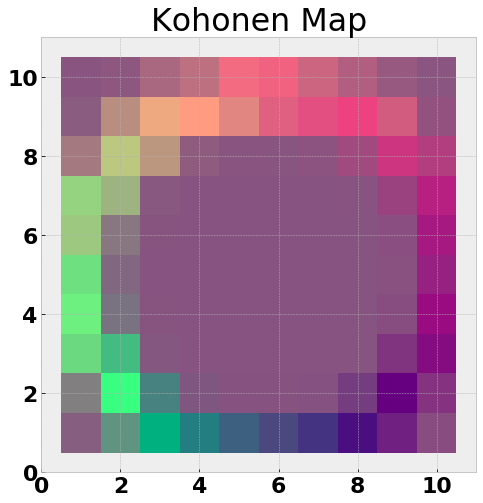

In [523]:
map_data = copy.copy(net.map)
map_data = map_data.reshape(-1,2)
map_data[:,0] = (map_data[:,0] - np.min(map_data[:,0]))/(np.max(map_data[:,0])-np.min(map_data[:,0]))
map_data[:,1] = (map_data[:,1] - np.min(map_data[:,1]))/(np.max(map_data[:,1])-np.min(map_data[:,1]))

col = map_data.reshape(net.M,net.N,2)
fig = plt.figure()
zeros = np.zeros((net.M,net.N,3))
zeros[:,:,2] = 0.5
zeros[:,:,:2] = col


ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.M+1))
ax.set_ylim((0, net.N+1))
ax.set_title('Kohonen Map')

# plot
for x in range(1, net.M + 1):
    for y in range(1, net.N + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=zeros[x-1,y-1,:],
                     edgecolor='none'))
plt.show()   

Individual clusters are separated from each other by negative values, which is produced by the second derivative of the Gaussian function.

# Cube

In [467]:
data = pd.read_csv("C:/Users/jaiko/Desktop/MIOD/Kohonen/mio2/cube.csv",header=0)
#data.x = (data.x - data.x.mean())/data.x.std()
#data.y = (data.y - data.y.mean())/data.y.std()
#data.z = (data.z - data.z.mean())/data.z.std()
x = np.array(data.iloc[:,0:3])
y = np.array((data.c))

## Original data

Text(0.5, 0, 'z')

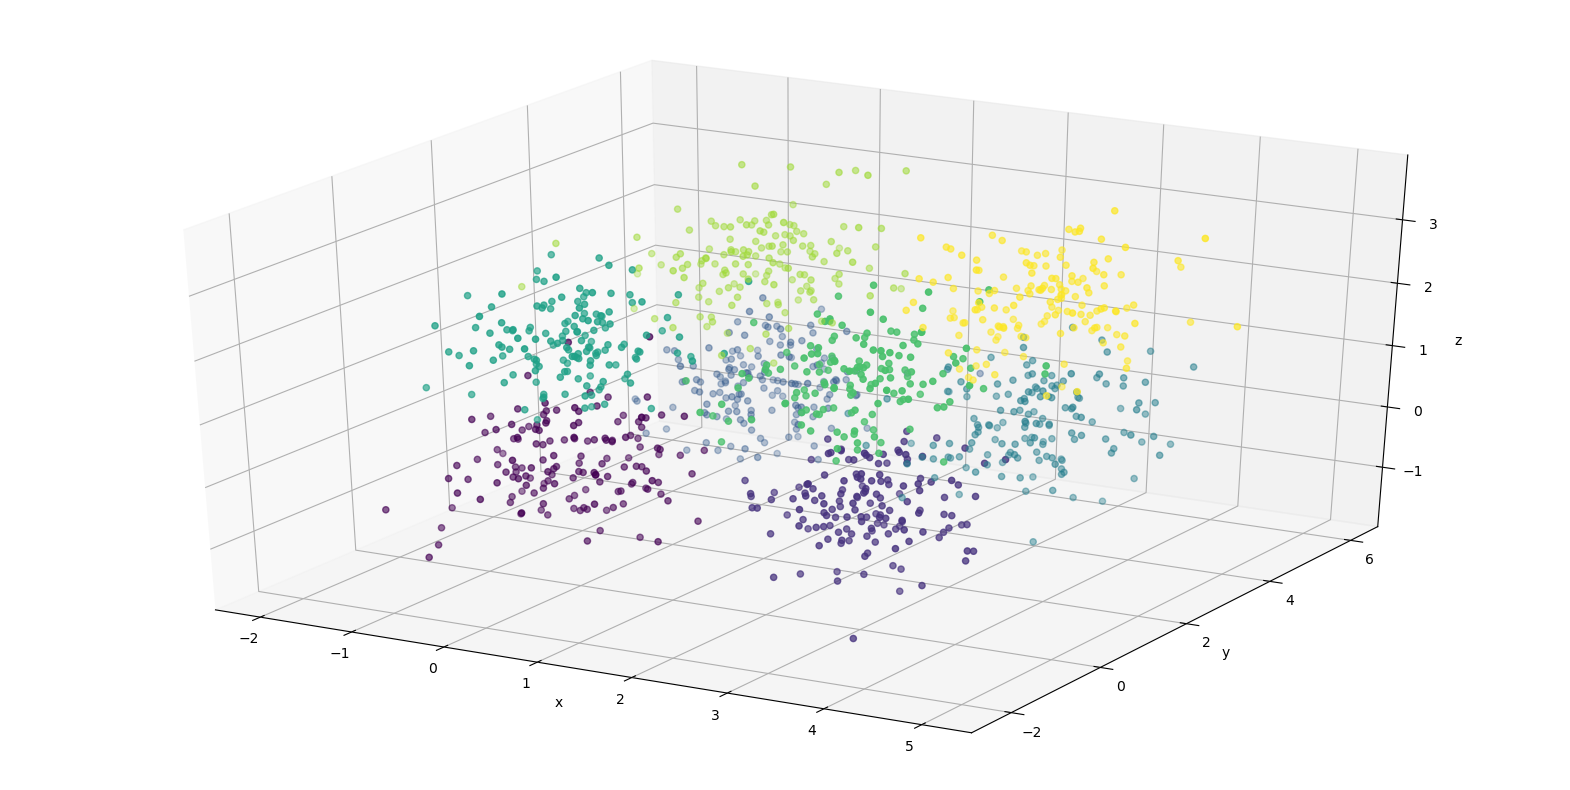

In [330]:
plt.figure(figsize=(20,10))    
ax = plt.axes(projection='3d')
ax.scatter(data.x, data.y, data.z, c=data.c)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# First try

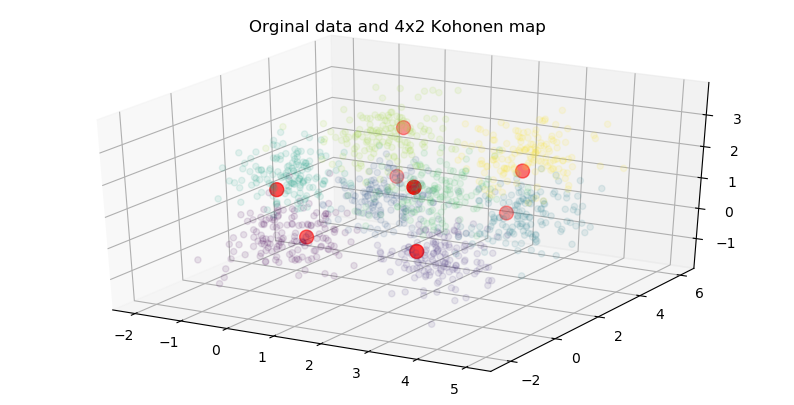

In [331]:
net = Kohonen_Network(4,2,3)
net.train(x, epochs = 20, n_width = 0.1)
map_data = net.map
map_data = map_data.reshape(-1,3)

plt.figure(figsize = [10,5]);
ax = plt.axes(projection='3d')
ax.scatter(data.x, data.y, data.z, c=data.c, alpha = 0.1)
ax.scatter(map_data[:,0], map_data[:,1], map_data[:,2], c = "red", s = 100)
plt.title("Orginal data and 4x2 Kohonen map");
plt.show();

## Gaussian function

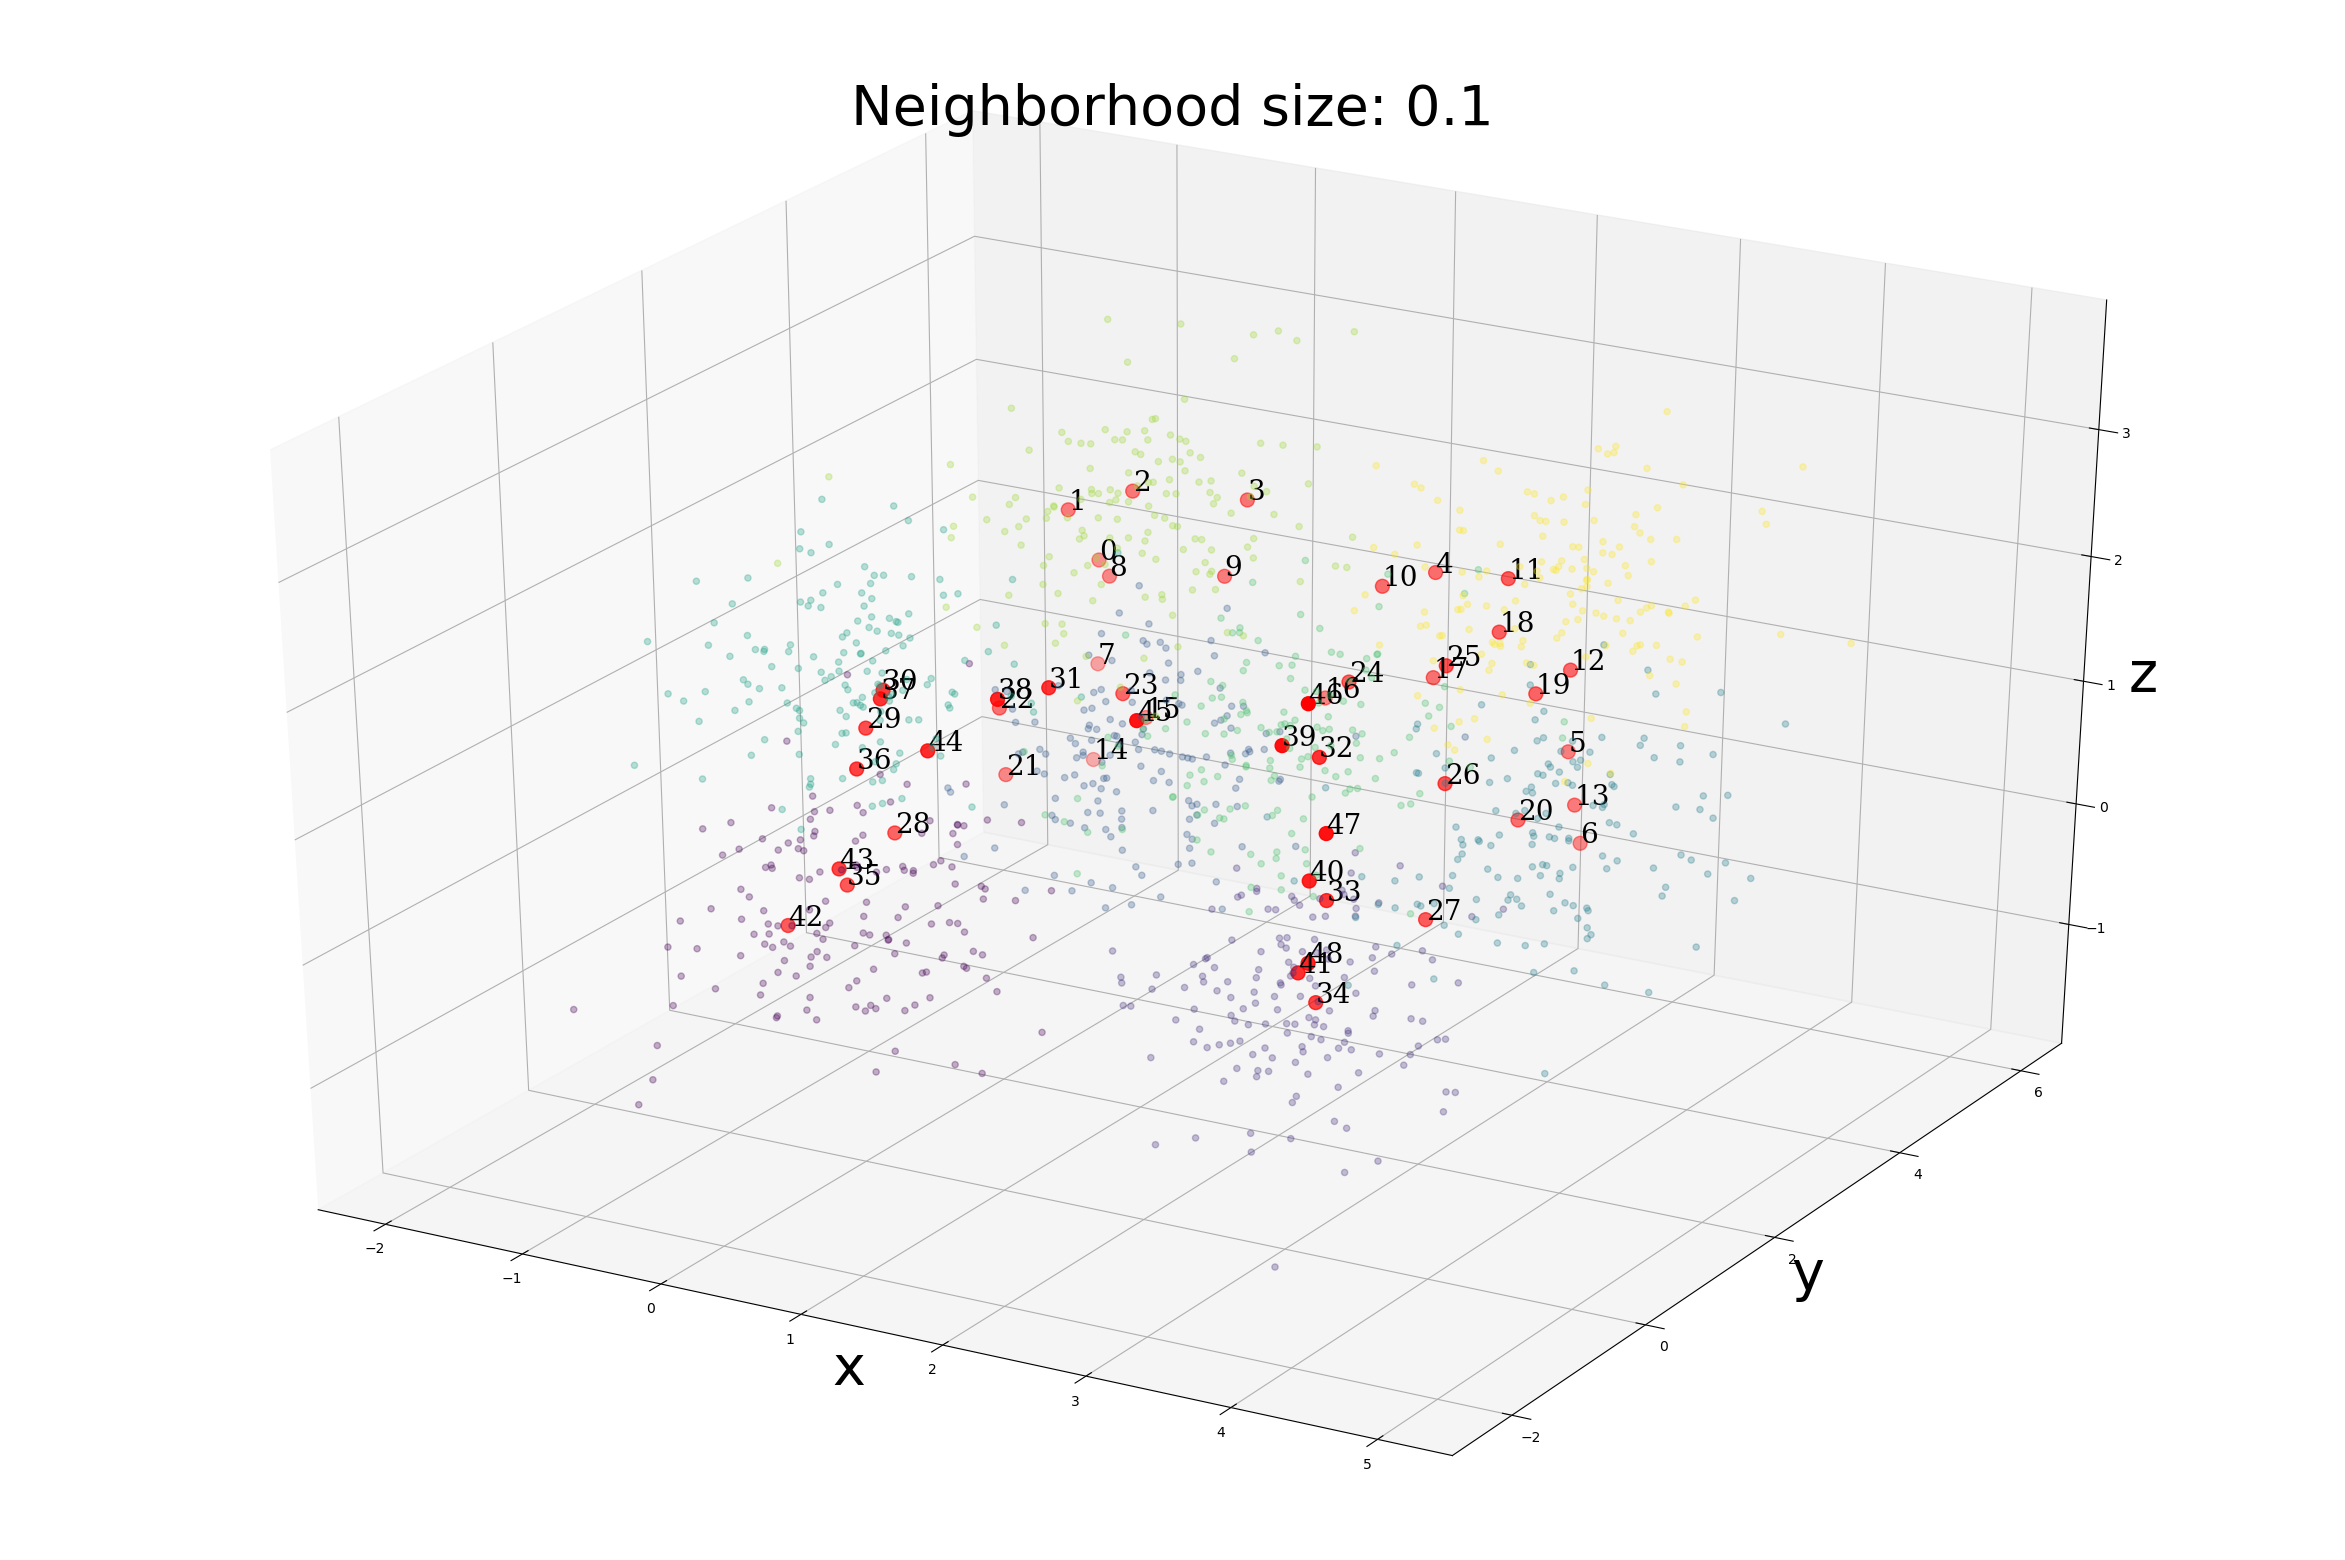

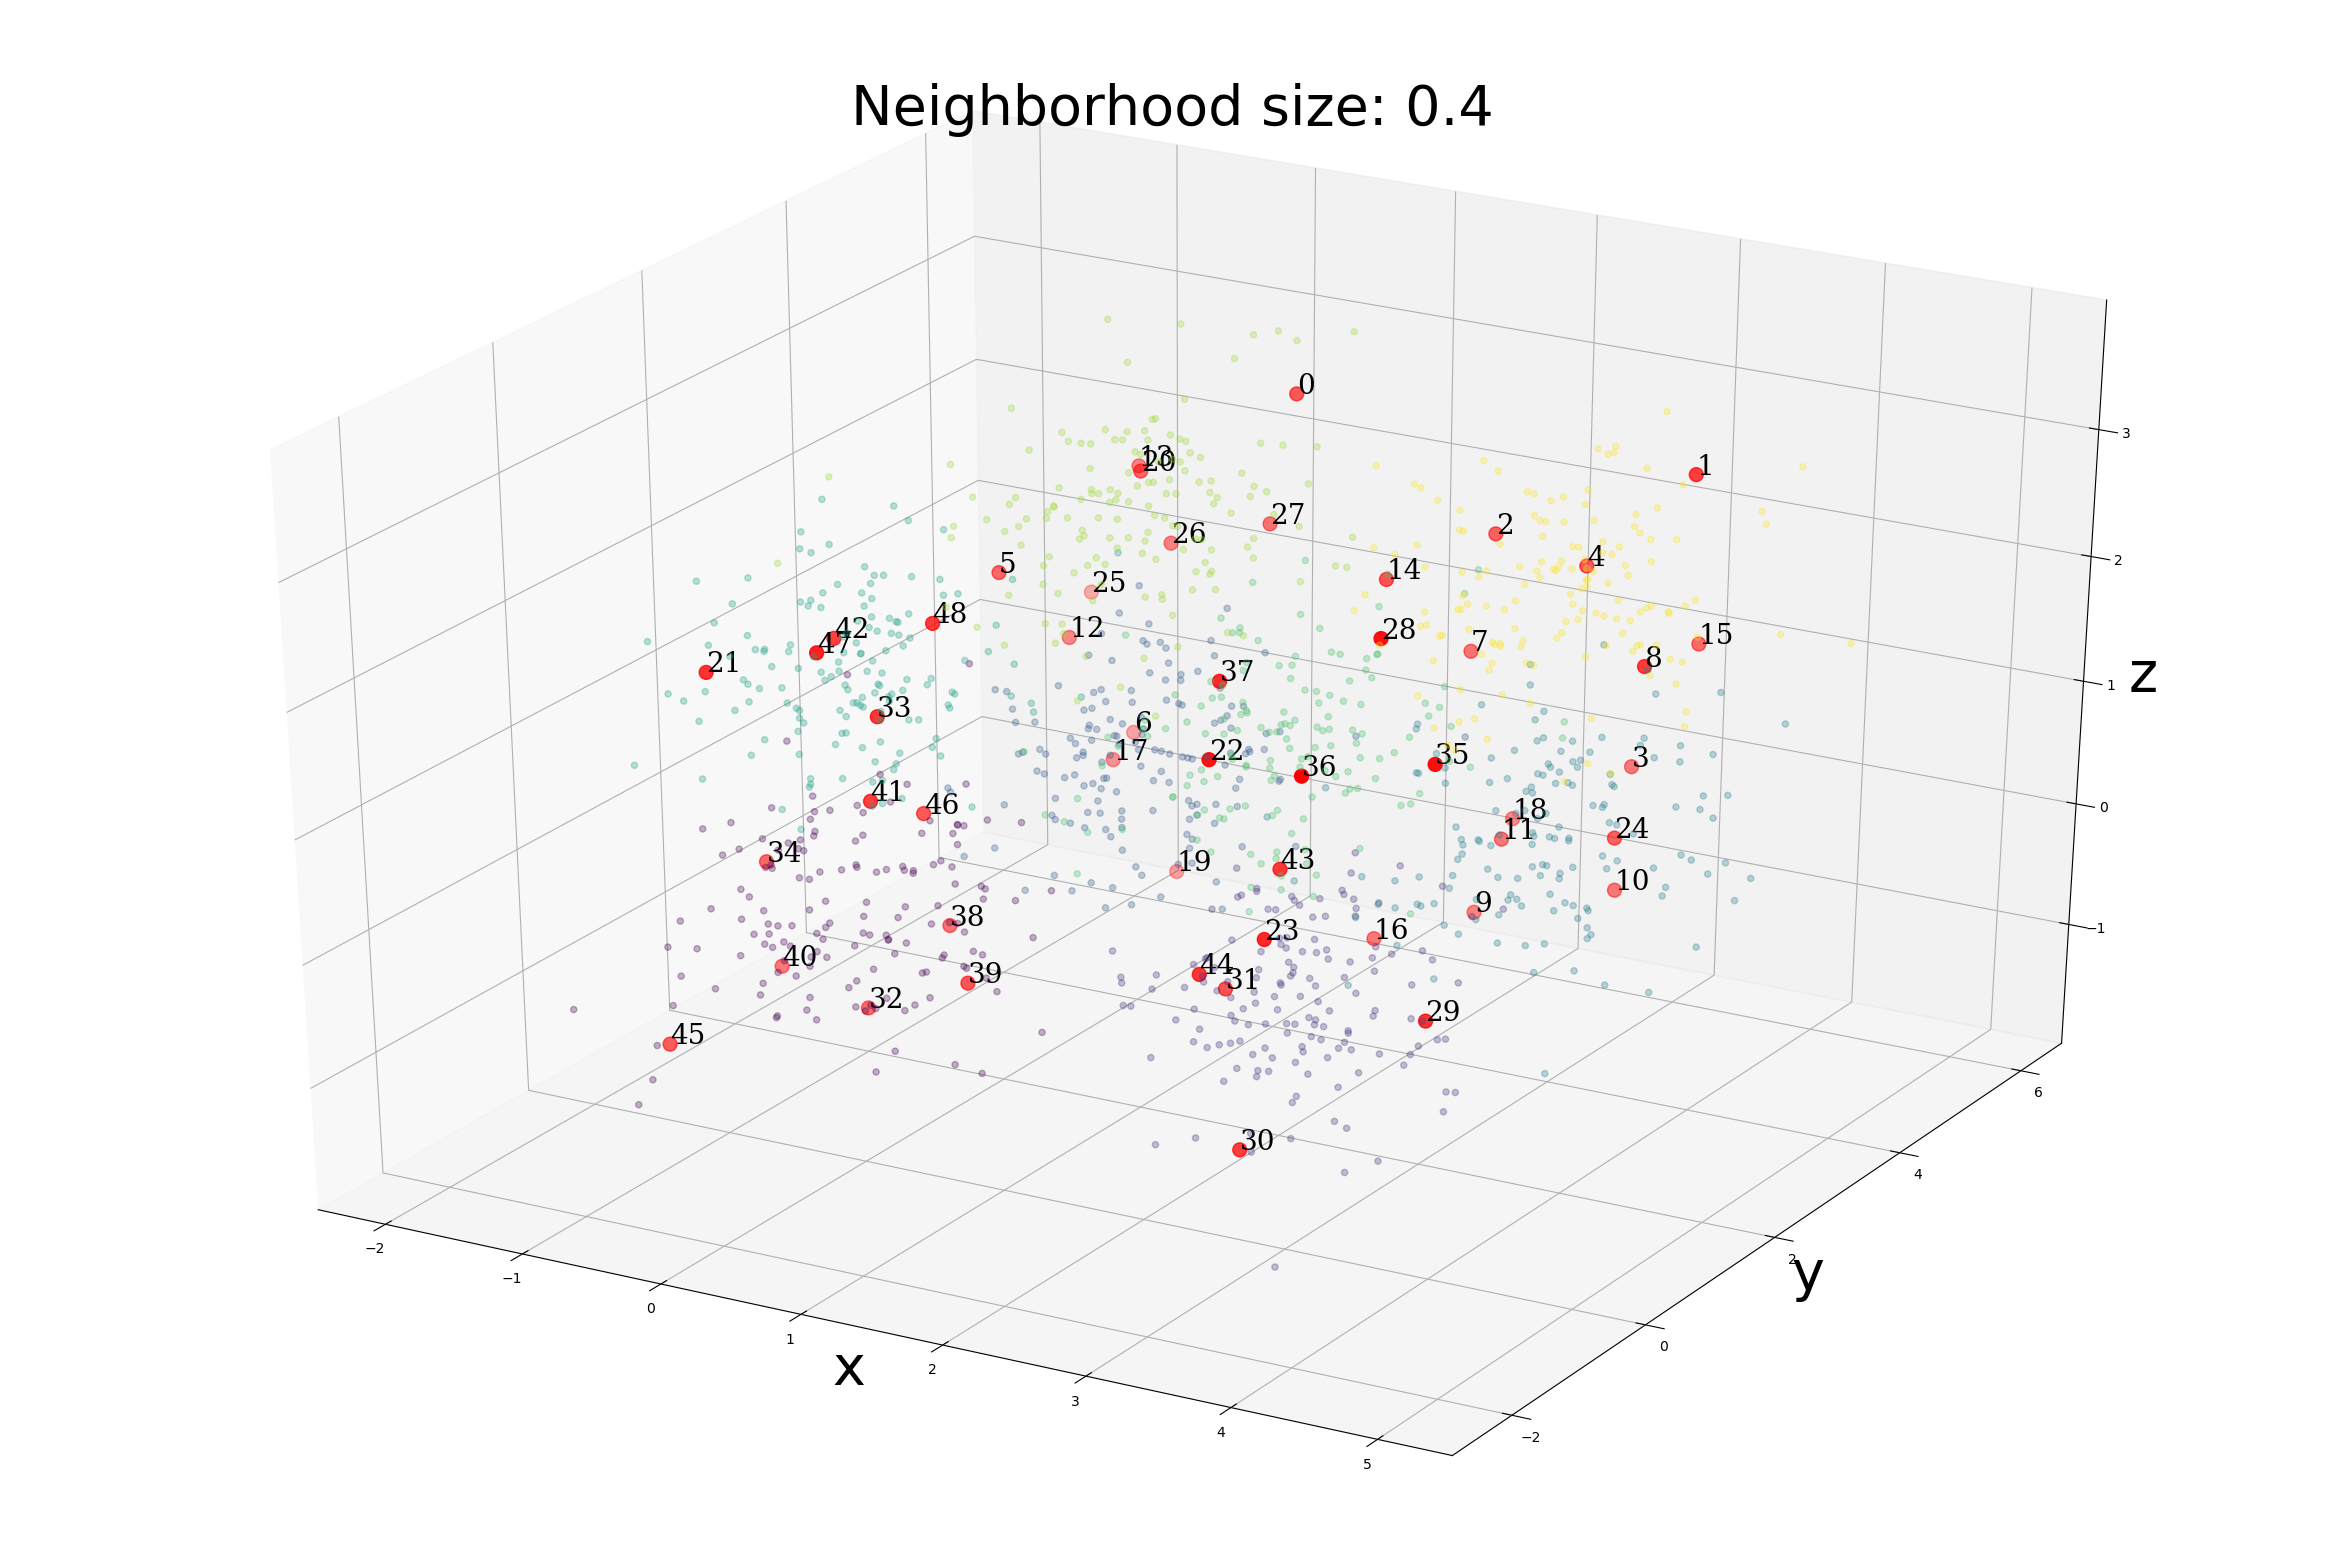

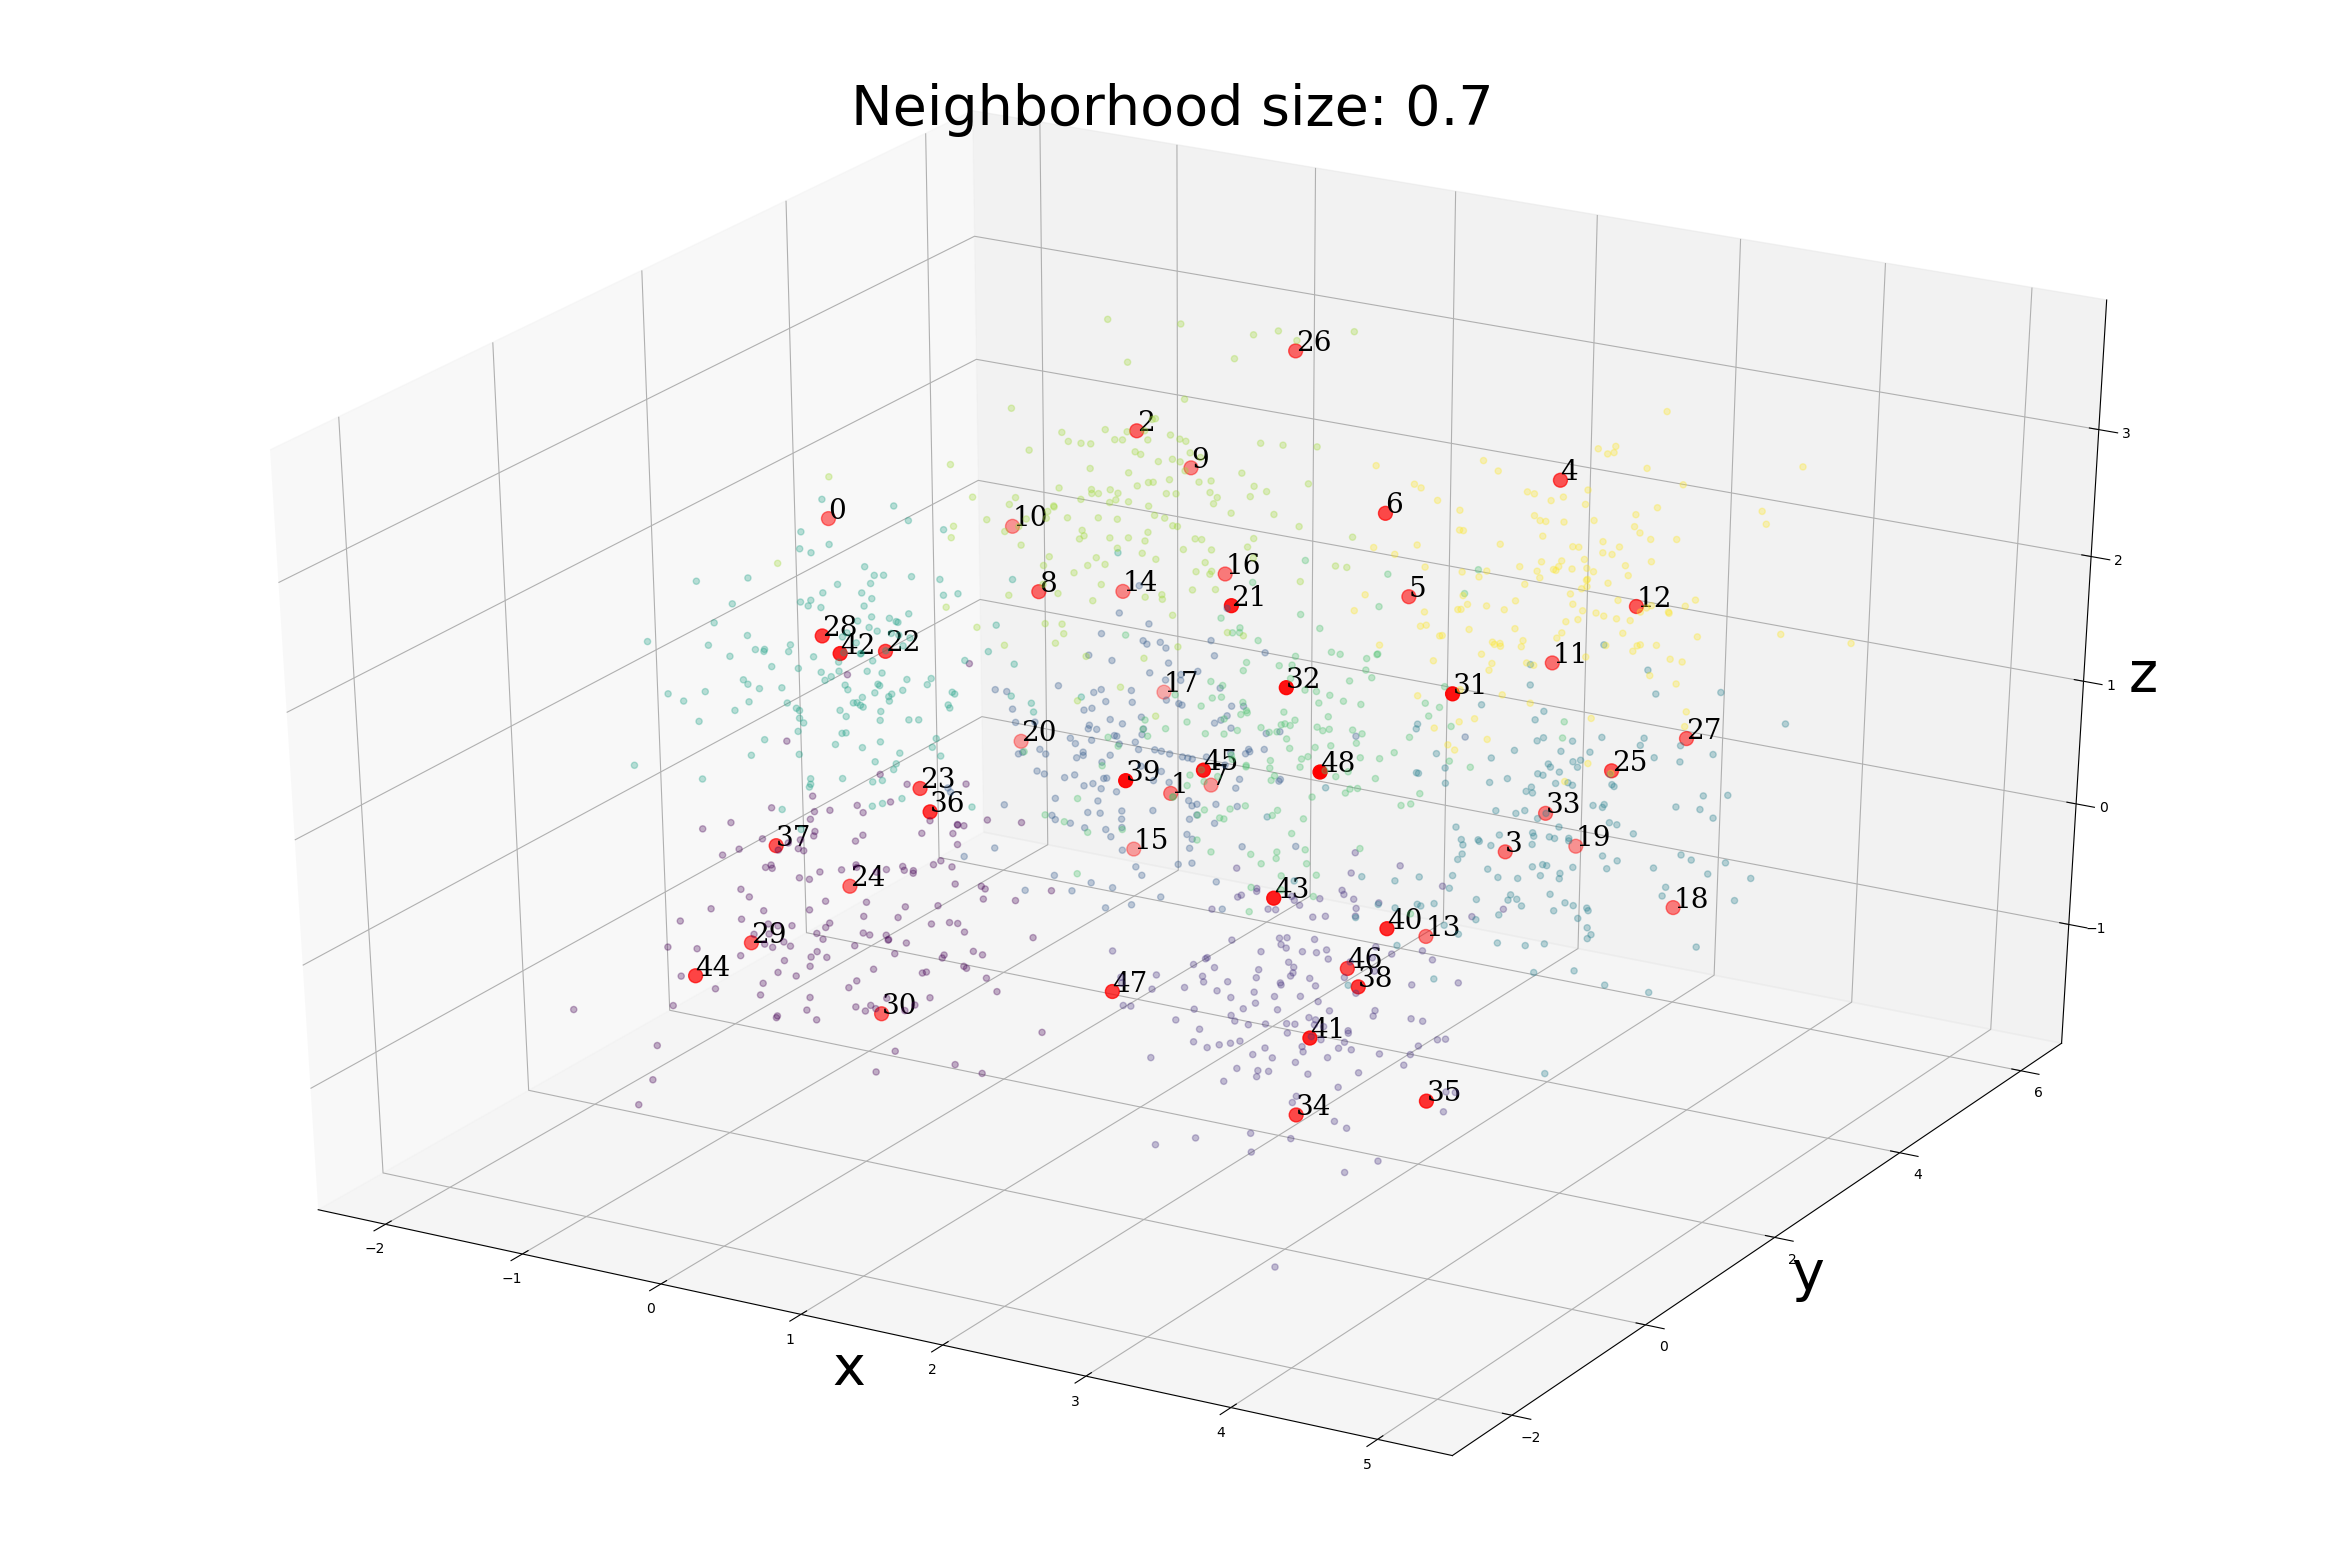

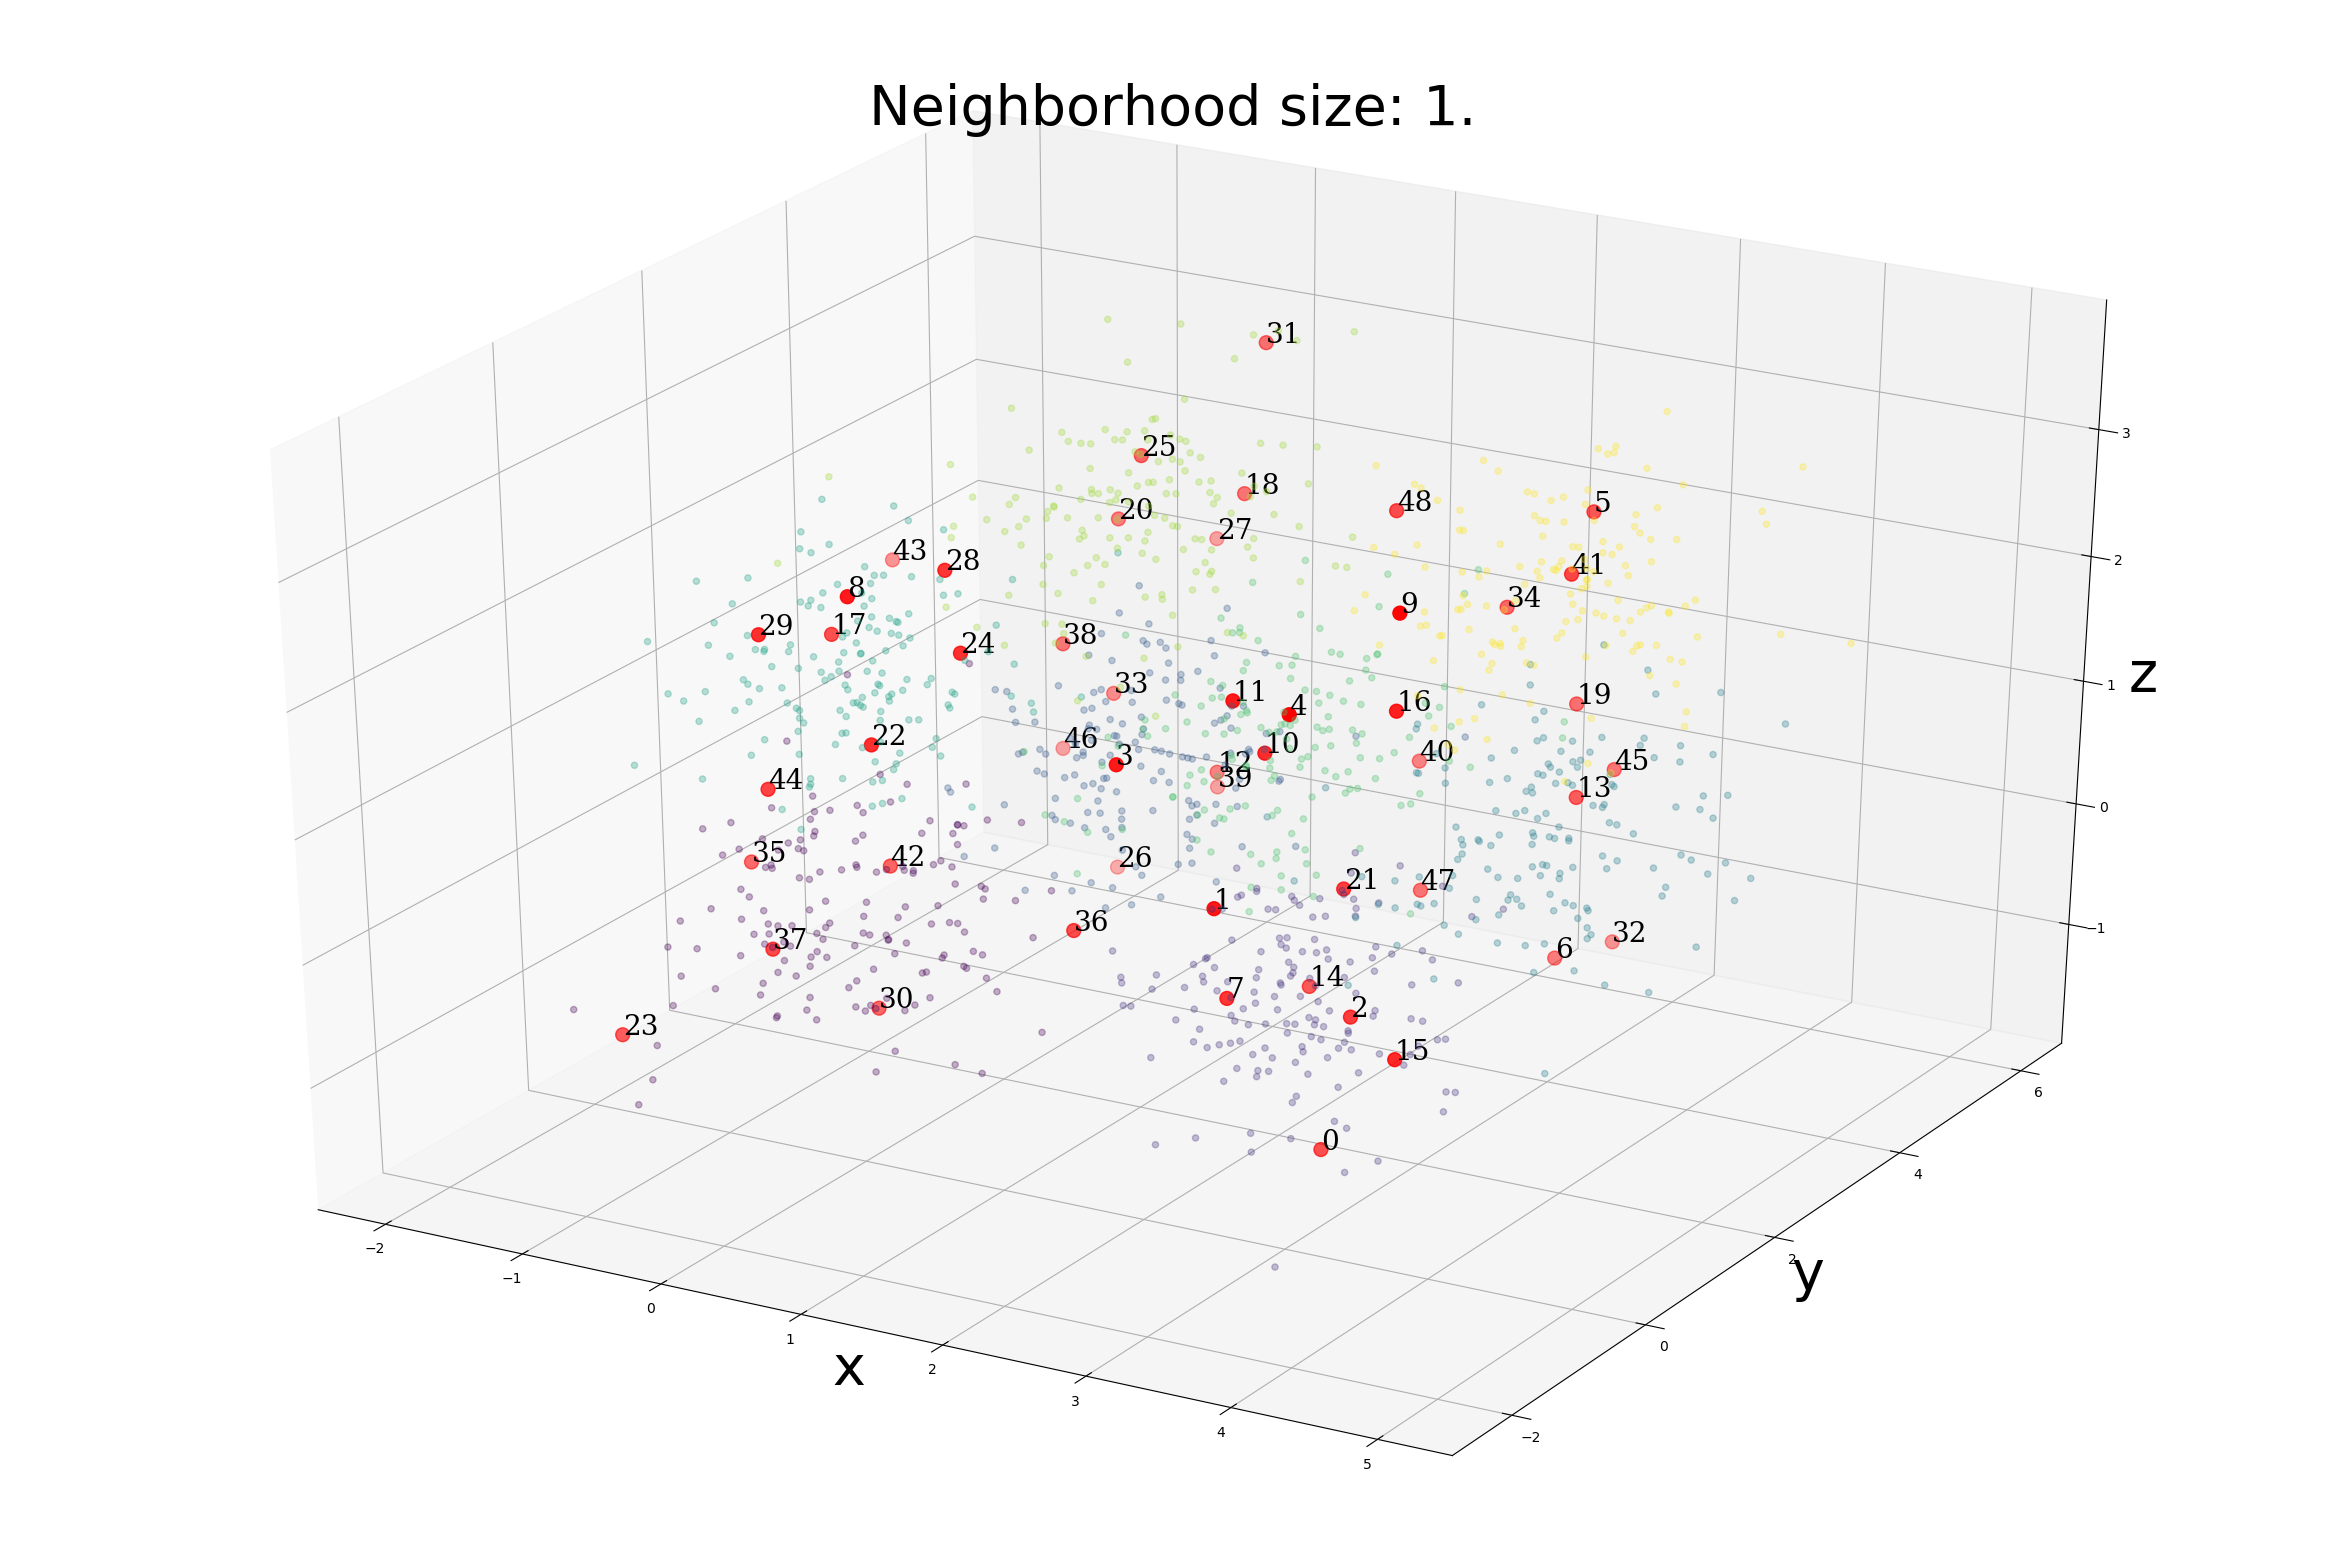

In [342]:
font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 20,
            }
neigh_size = np.arange(0.1,1.1,0.3)

for size in neigh_size:
    i=0
    net = Kohonen_Network(7,7,3)
    net.train(x, epochs = 10, n_width = size)
    map_data = net.map
    map_data = map_data.reshape(-1,3)

    plt.figure(figsize=(30,20)) 
    ax = plt.axes(projection='3d')
    ax.scatter(data.x, data.y, data.z, c=data.c, alpha = 0.3)
    ax.scatter(map_data[:,0], map_data[:,1], map_data[:,2], c = "red", s = 100)
    for a in range(1, net.M + 1):
        for b in range(1, net.N + 1):
            ax.text(net.map[a-1,b-1,:][0], net.map[a-1,b-1,:][1], net.map[a-1,b-1,:][2], str(i), fontdict=font)
            i += 1
    ax.set_xlabel('x', fontsize = 40)
    ax.set_ylabel('y', fontsize = 40)
    ax.set_zlabel('z', fontsize = 40)
    plt.title("Neighborhood size: " + np.array2string(size), fontsize = 40);
    plt.show();
pass;  

In three dimensions it is harder to see, but the network has divided the points in a similar way as they appear in the original set. 
The higher the size of the neighborhood, the more widespread points are.

## Weight Heatmap

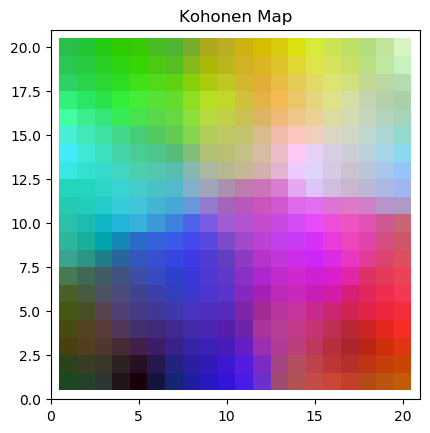

In [369]:
data = pd.read_csv("C:/Users/jaiko/Desktop/MIOD/Kohonen/mio2/cube.csv",header=0)
x = np.array(data.iloc[:,0:3])
y = np.array((data.c))
net = Kohonen_Network(20,20,3)
net.train(x, epochs = 4, n_width = 0.3)
map_data = net.map
map_data = map_data.reshape(-1,3)
map_data[:,0] = (map_data[:,0] - np.min(map_data[:,0]))/(np.max(map_data[:,0])-np.min(map_data[:,0]))
map_data[:,1] = (map_data[:,1] - np.min(map_data[:,1]))/(np.max(map_data[:,1])-np.min(map_data[:,1]))
map_data[:,2] = (map_data[:,2] - np.min(map_data[:,2]))/(np.max(map_data[:,2])-np.min(map_data[:,2]))
fig = plt.figure()
col = map_data.reshape(net.M,net.N,3)
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.M+1))
ax.set_ylim((0, net.N+1))
ax.set_title('Kohonen Map')

# plot
for x in range(1, net.M + 1):
    for y in range(1, net.N + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=col[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

We can see that there is happening a lot. Nuerons that are close together have similar weights, you can see a division into several clusters.

## Gaussian second derivative

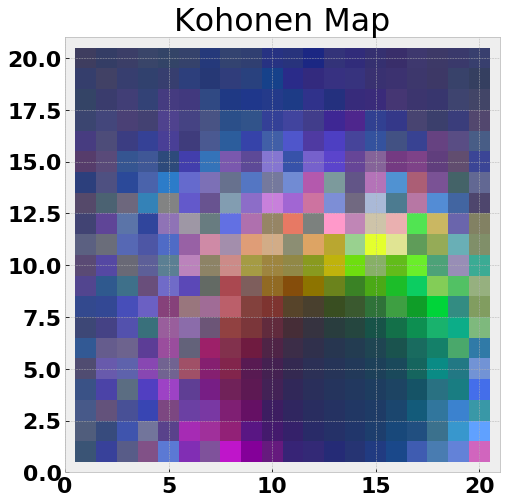

In [510]:
data = pd.read_csv("C:/Users/jaiko/Desktop/MIOD/Kohonen/mio2/cube.csv",header=0)
data.x = (data.x - data.x.mean())/data.x.std()
data.y = (data.y - data.y.mean())/data.y.std()
data.z = (data.z - data.z.mean())/data.z.std()
x = np.array(data.iloc[:,0:3])
y = np.array((data.c))
net = Kohonen_Network(20,20,3)
net.train(x, epochs = 4, n_width = 7, n_fun = "second")
map_data = net.map
map_data = map_data.reshape(-1,3)
map_data[:,0] = (map_data[:,0] - np.min(map_data[:,0]))/(np.max(map_data[:,0])-np.min(map_data[:,0]))
map_data[:,1] = (map_data[:,1] - np.min(map_data[:,1]))/(np.max(map_data[:,1])-np.min(map_data[:,1]))
map_data[:,2] = (map_data[:,2] - np.min(map_data[:,2]))/(np.max(map_data[:,2])-np.min(map_data[:,2]))
fig = plt.figure()
col = map_data.reshape(net.M,net.N,3)
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.M+1))
ax.set_ylim((0, net.N+1))
ax.set_title('Kohonen Map')

# plot
for x in range(1, net.M + 1):
    for y in range(1, net.N + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=col[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

Individual clusters are separated from each other by negative values, which is produced by the second derivative of the Gaussian function.

# Lab 2

## MNIST

In [28]:
from mlxtend.data import loadlocal_mnist
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\n1st row \n', X[0])

Dimensions: 60000 x 784

1st row 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253

### Rectangular grid

In [101]:
#Scale
#X_s = X/253
X_s = X
X_s = X_s[1:1000,:]

net1 = Kohonen_Network(10,10,784)
net1.train(X_s, epochs = 10, n_width = 0.1)

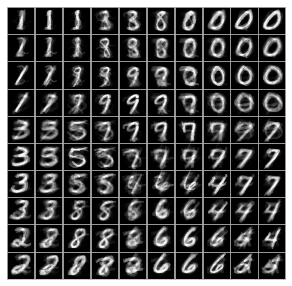

In [102]:
f, axarr = plt.subplots(net1.M,net1.N,figsize=(5,5))



# plot
for x in range(0, net1.M ):
    for y in range(0, net1.N):
        axarr[x,y].imshow(net1.map[x,y,:].astype(int).reshape(28,28), cmap='gray')
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)       
plt.show()

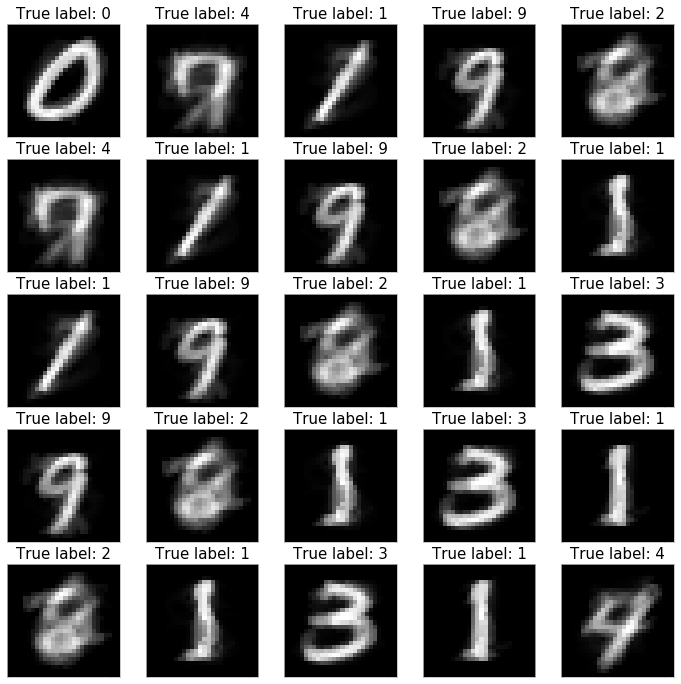

In [120]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
images = []
for i in range( 25):
    _, cord = net1.closest_neuron(X_s[i])
    images.append(net1.map[cord[0],cord[1],:].astype(int).reshape(28,28))
    
f, axarr = plt.subplots(5,5,figsize=(12,12))

# plot
for i in range(0, 5):
    for j in range(0, 5):
        axarr[i,j].imshow(images[i+j], cmap='gray')
        axarr[i,j].set_xticklabels([])
        axarr[i,j].set_yticklabels([])
        axarr[i,j].set_title("True label: " + np.array2string(y[i+j+1]), fontsize = 15)
        #axarr[x,y].axis("off")
        axarr[i,j].set_aspect('equal')
        axarr[i,j].grid(False)
              
plt.show()
   

## Second derivative

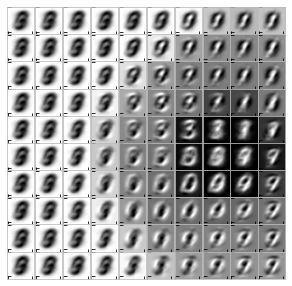

In [124]:
net3 = Kohonen_Network(10,10,784)
net3.train(X_s, epochs = 5, n_width = 5, n_fun = "second")
f, axarr = plt.subplots(net3.M,net3.N,figsize=(5,5))



# plot
for x in range(0, net3.M ):
    for y in range(0, net3.N):
        axarr[x,y].imshow(net3.map[x,y,:].astype(int).reshape(28,28), cmap='gray')
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)       
plt.show()

### Hexagonal grid

In [104]:
net2 = Kohonen_Network(10,10,784, top="hex")
net2.train(X_s, epochs = 10, n_width = 0.1)

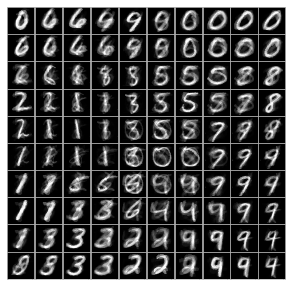

In [106]:
f, axarr = plt.subplots(net2.M,net2.N,figsize=(5,5))



# plot
for x in range(0, net2.M ):
    for y in range(0, net2.N):
        axarr[x,y].imshow(net2.map[x,y,:].astype(int).reshape(28,28), cmap='gray')
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)       
plt.show()

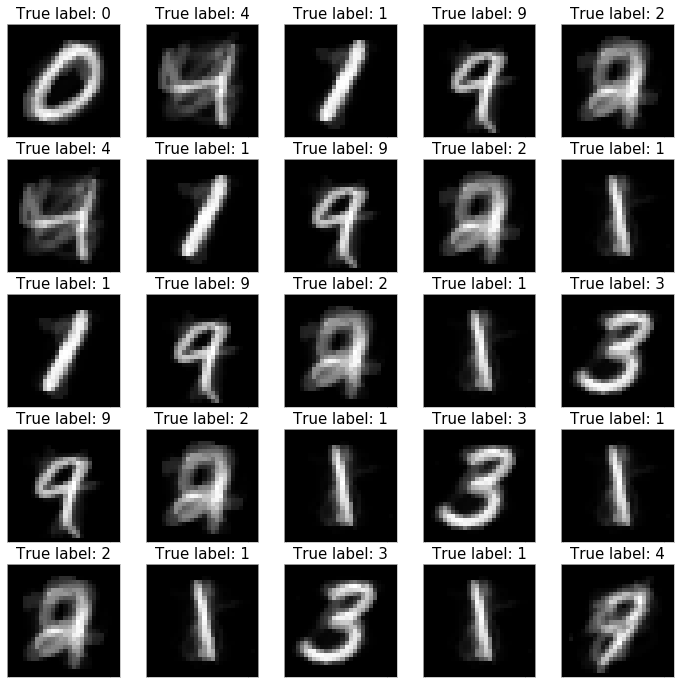

In [119]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
images = []
for i in range( 25):
    _, cord = net2.closest_neuron(X_s[i])
    images.append(net2.map[cord[0],cord[1],:].astype(int).reshape(28,28))
    
f, axarr = plt.subplots(5,5,figsize=(12,12))

# plot
for i in range(0, 5):
    for j in range(0, 5):
        axarr[i,j].imshow(images[i+j], cmap='gray')
        axarr[i,j].set_xticklabels([])
        axarr[i,j].set_yticklabels([])
        axarr[i,j].set_title("True label: " + np.array2string(y[i+j+1]), fontsize = 15)
        #axarr[x,y].axis("off")
        axarr[i,j].set_aspect('equal')
        axarr[i,j].grid(False)
              
plt.show()

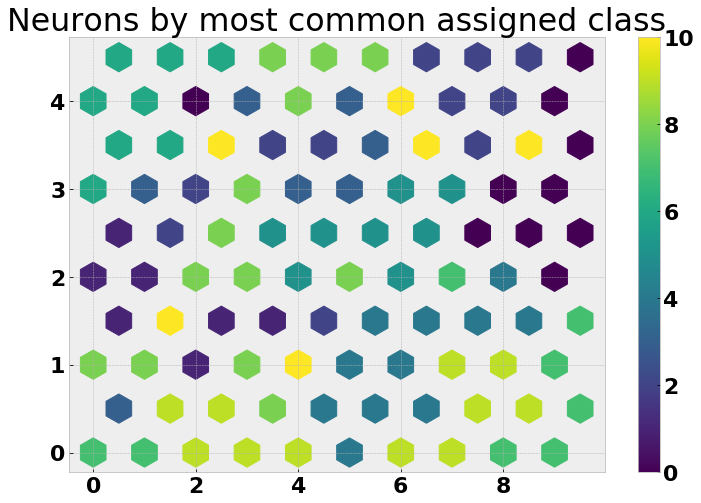

In [356]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
y_s = y[1:1000]
net7 = Kohonen_Network(10,10,784, top="hex")
net7.train(X_s, epochs = 10, n_width = 0.1)
cmap = matplotlib.cm.get_cmap('Paired')
scores = [ [ [10] for j in range(net7.N)] for i in range(net7.M)]

for i in range(X_s.shape[0]):
    _, cord = net7.closest_neuron(X_s[i])
    scores[cord[0]][cord[1]].append(int(y_s[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net7.N)] for i in range(net7.M)]

x =[]
y = []
c = []

for i in range(0, int(net7.M) ):
    for j in range(0, int(net7.N/2) ):
        x.append(float(i))
        y.append(float(j))
        x.append(i+0.5)
        y.append(j+0.5)
        
        
for i in range(0, net7.M ):
    for j in range(0, net7.N ):
        c.append(scores_mod[i][j][0])
        
plt.figure()
plt.hexbin(x = x, y = y, C = c, gridsize = (19,9))
plt.colorbar()
plt.title("Neurons by most common assigned class")
plt.show()

## Second derivative

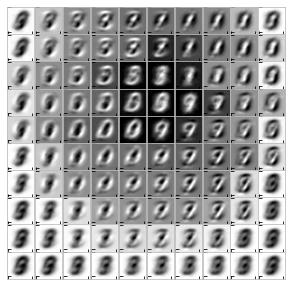

In [125]:
net3 = Kohonen_Network(10,10,784, top = "hex")
net3.train(X_s, epochs = 5, n_width = 5, n_fun = "second")
f, axarr = plt.subplots(net3.M,net3.N,figsize=(5,5))



# plot
for x in range(0, net3.M ):
    for y in range(0, net3.N):
        axarr[x,y].imshow(net3.map[x,y,:].astype(int).reshape(28,28), cmap='gray')
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)       
plt.show()

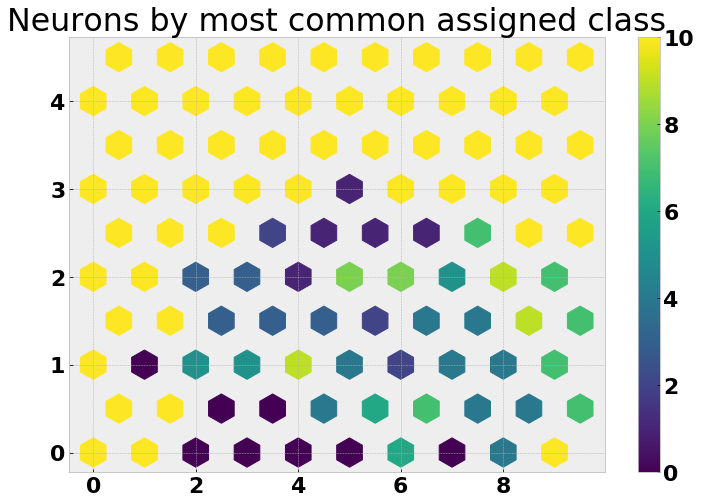

In [352]:
X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')
y_s = y[1:1000]
net7 = Kohonen_Network(10,10,784, top="hex")
net7.train(X_s, epochs = 10, n_width = 10, n_fun = "second")

scores = [ [ [10] for j in range(net7.N)] for i in range(net7.M)]

for i in range(X_s.shape[0]):
    _, cord = net7.closest_neuron(X_s[i])
    scores[cord[0]][cord[1]].append(int(y_s[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net7.N)] for i in range(net7.M)]

x =[]
y = []
c = []

for i in range(0, int(net7.M) ):
    for j in range(0, int(net7.N/2) ):
        x.append(float(i))
        y.append(float(j))
        x.append(i+0.5)
        y.append(j+0.5)
        
        
for i in range(0, net7.M ):
    for j in range(0, net7.N ):
        c.append(scores_mod[i][j][0])
        
plt.figure()
plt.hexbin(x = x, y = y, C = c, gridsize = (19,9))
plt.colorbar()
plt.title("Neurons by most common assigned class")
plt.show()

# Human activity

In [129]:
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
dataX = load_file('HARDataset/train/X_train.txt')
dataY = load_file('HARDataset/train/y_train.txt')

In [132]:
np.unique(dataY)

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [133]:
dataX.shape

(7352, 561)

## Rectangular

In [176]:
dataXsub = dataX[0:1000,:]
dataYsub = dataY[0:1000,:]
net5 = Kohonen_Network(10,10,561)
net5.train(dataXsub, epochs = 5, n_width = 0.1)

### Gaussian

In [177]:
scores = [ [ [0] for j in range(net5.N)] for i in range(net5.M)]

for i in range(dataXsub.shape[0]):
    _, cord = net5.closest_neuron(dataXsub[i])
    scores[cord[0]][cord[1]].append(int(dataYsub[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net5.N)] for i in range(net5.M)]


[[[2], [2], [2], [2], [2], [3], [3], [3], [1], [1]],
 [[2], [2], [2], [3], [3], [1], [1], [1], [1], [1]],
 [[2], [2], [2], [1], [1], [1], [1], [1], [1], [1]],
 [[2], [2], [2], [1], [1], [1], [1], [1], [0], [0]],
 [[6], [0], [0], [0], [1], [0], [0], [0], [0], [6]],
 [[5], [5], [0], [0], [0], [0], [0], [0], [0], [6]],
 [[4], [5], [5], [5], [0], [0], [0], [6], [6], [6]],
 [[4], [4], [5], [5], [5], [4], [0], [6], [0], [6]],
 [[4], [5], [5], [0], [0], [4], [0], [6], [0], [6]],
 [[4], [5], [5], [5], [5], [4], [0], [6], [6], [6]]]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


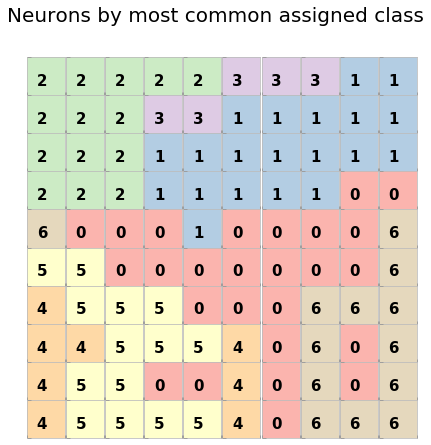

In [218]:
f, axarr = plt.subplots(net5.M,net5.N,figsize=(7,7))


cmap = matplotlib.cm.get_cmap('Pastel1')
# plot
for x in range(0, net5.M ):
    for y in range(0, net5.N):
        axarr[x,y].text(s = int(scores_mod[x][y][0]), x = 0.25, y = 0.25, fontsize = 15)
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        axarr[x,y].set_facecolor(cmap(int(scores_mod[x][y][0])))
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)
f.suptitle('Neurons by most common assigned class', fontsize = 20)
plt.show()

### Second derivative of Gaussian

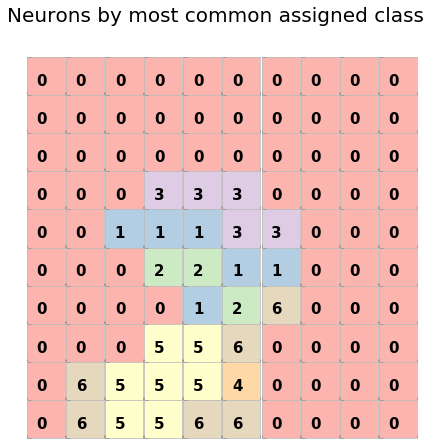

In [222]:
dataXsub = dataX[0:1000,:]
dataYsub = dataY[0:1000,:]
net6 = Kohonen_Network(10,10,561)
net6.train(dataXsub, epochs = 6, n_width = 10, n_fun = "second")

scores = [ [ [0] for j in range(net6.N)] for i in range(net6.M)]

for i in range(dataXsub.shape[0]):
    _, cord = net6.closest_neuron(dataXsub[i])
    scores[cord[0]][cord[1]].append(int(dataYsub[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net6.N)] for i in range(net6.M)]

f, axarr = plt.subplots(net6.M,net6.N,figsize=(7,7))


cmap = matplotlib.cm.get_cmap('Pastel1')
# plot
for x in range(0, net6.M ):
    for y in range(0, net6.N):
        axarr[x,y].text(s = int(scores_mod[x][y][0]), x = 0.25, y = 0.25, fontsize = 15)
        axarr[x,y].set_xticklabels([])
        axarr[x,y].set_yticklabels([])
        axarr[x,y].set_facecolor(cmap(int(scores_mod[x][y][0])))
        #axarr[x,y].axis("off")
        axarr[x,y].set_aspect('equal')
        axarr[x,y].grid(False)
        
f.subplots_adjust(wspace=0, hspace=0)
f.suptitle('Neurons by most common assigned class', fontsize = 20)
plt.show()

## Hexagonal

### Gaussian

In [338]:
dataXsub = dataX[0:1000,:]
dataYsub = dataY[0:1000,:]
net7 = Kohonen_Network(10,10,561, top = "hex")
net7.train(dataXsub, epochs = 6, n_width = 0.1)

scores = [ [ [0] for j in range(net7.N)] for i in range(net7.M)]

for i in range(dataXsub.shape[0]):
    _, cord = net7.closest_neuron(dataXsub[i])
    scores[cord[0]][cord[1]].append(int(dataYsub[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net7.N)] for i in range(net7.M)]

x =[]
y = []
c = []

for i in range(0, int(net7.M) ):
    for j in range(0, int(net7.N/2) ):
        x.append(float(i))
        y.append(float(j))
        x.append(i+0.5)
        y.append(j+0.5)
        
        
for i in range(0, net7.M ):
    for j in range(0, net7.N ):
        c.append(scores_mod[i][j][0])

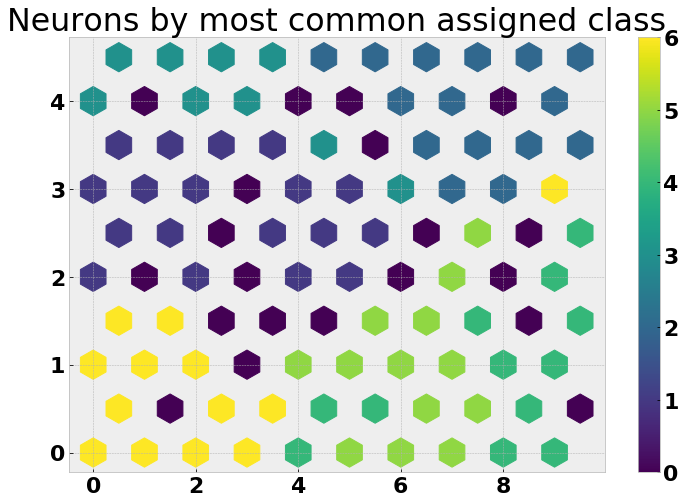

In [344]:
plt.figure()
plt.hexbin(x = x, y = y, C = c, gridsize = (19,9))
plt.colorbar()
plt.title("Neurons by most common assigned class")
plt.show()

### Gaussian second derivative

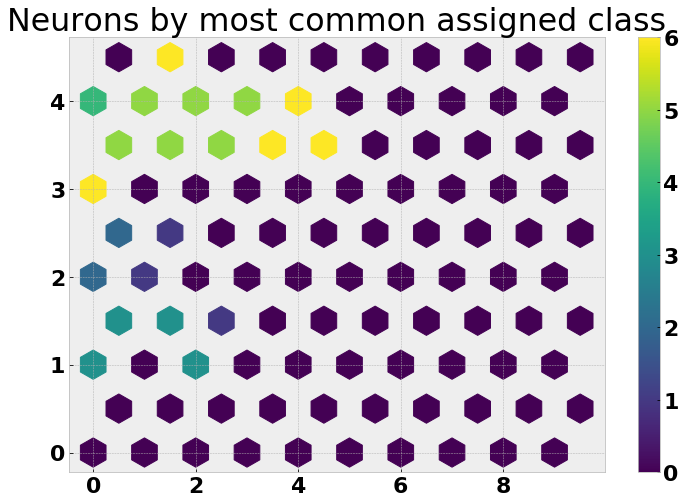

In [346]:
dataXsub = dataX[0:1000,:]
dataYsub = dataY[0:1000,:]
net8 = Kohonen_Network(10,10,561, top = "hex")
net8.train(dataXsub, epochs = 6, n_width = 10, n_fun = "second")

scores = [ [ [0] for j in range(net8.N)] for i in range(net8.M)]

for i in range(dataXsub.shape[0]):
    _, cord = net8.closest_neuron(dataXsub[i])
    scores[cord[0]][cord[1]].append(int(dataYsub[i]))
    
scores_mod = [ [ [max(set(scores[i][j]), key=scores[i][j].count)] for j in range(net8.N)] for i in range(net8.M)]

x =[]
y = []
c = []

for i in range(0, int(net8.M) ):
    for j in range(0, int(net8.N/2) ):
        x.append(float(i))
        y.append(float(j))
        x.append(i+0.5)
        y.append(j+0.5)
        
        
for i in range(0, net8.M ):
    for j in range(0, net8.N ):
        c.append(scores_mod[i][j][0])
        
plt.figure()
plt.hexbin(x = x, y = y, C = c, gridsize = (19,9))
plt.colorbar()
plt.title("Neurons by most common assigned class")
plt.show()

Źródła:

- http://mini.pw.edu.pl/~karwowskij/mioad/wyklad2.pdf - lectures
- https://github.com/tcosmo/tcosmo.github.io/blob/master/assets/soms/code/SOM_viz.ipynb - idea for visualisation
- https://books.google.pl/books?id=-fQGKI8ke_cC&pg=PA76&lpg=PA76&dq=som+second+derivative+gaussian&source=bl&ots=mIXex-tGMG&sig=ACfU3U2tHFMHlOWq28loSzx0-kFCEXDktA&hl=en&sa=X&ved=2ahUKEwjDm5WsvonpAhVKkMMKHSD8A20Q6AEwCHoECAwQAQ#v=snippet&q=sigma&f=false - second derivative idea

- https://stackoverflow.com/questions/24766079/hexagonal-grid-flat-top-distance-calculation distance visualisation

,,Potwierdzam samodzielność powyższej pracy oraz niekorzystanie przeze mnie z niedozwolonych źródeł"